<a href="https://colab.research.google.com/github/SunnyDahitJ/ML-programs/blob/main/lab_7(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression is a supervised learning classification algorithm

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df =pd.read_csv("Social_Network_Ads.csv")
le = LabelEncoder()
print(df.count())
df["Gender"]= le.fit_transform(df["Gender"])
x = df.iloc[:,:4]
y = df.iloc[:,4:5]

# df= pd.read_csv("Crop_recommendation.csv")
# df = df[:200]
# feature = df.iloc[: , :7]
# feature
# target = df.iloc[:, 7:8]
# # target
# df.describe()

# df. 

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size =.30,random_state=20, shuffle = True)


# X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.30,random_state=20, shuffle=True)

In [43]:
from sklearn.linear_model import LogisticRegression 

l_model = LogisticRegression()
l_model.fit(X_train, y_train)

Pred = l_model.predict(X_test)

# model = LogisticRegression()
# model.fit(X_train, y_train)

# prediction = model.predict(X_test)
# print(prediction)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(f"Accuracy of the algo is  : {accuracy_score(y_test, Pred)}")

print(f"Classification report is  : {classification_report( y_test,Pred)}")

print(f"{confusion_matrix(y_test,Pred)}")

# print(accuracy_score( y_test, prediction))
# print(classification_report(prediction, y_test))

# print(f"{confusion_matrix(y_test,prediction)}")

Accuracy of the algo is  : 0.7583333333333333
Classification report is  :               precision    recall  f1-score   support

           0       0.72      0.97      0.82        70
           1       0.92      0.46      0.61        50

    accuracy                           0.76       120
   macro avg       0.82      0.72      0.72       120
weighted avg       0.80      0.76      0.74       120

[[68  2]
 [27 23]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


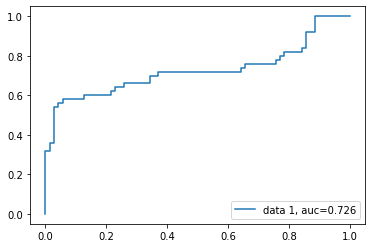

In [48]:
# import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = l_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()